# 🎵 **Exploratory Data Analysis (EDA) - Spotify Dataset** 🎧  

## 📌 **Objective**  
The goal of this EDA is to analyze and understand the relationships between different song attributes, streaming metrics, and other numerical features.  


## 📂 **Dataset Overview**  
- The dataset contains multiple numerical and categorical features related to **Spotify songs**.  
- We focus on **correlation analysis** to identify dependencies between key features.  


In [16]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "new_spotify_featured_data.csv"
df = pd.read_csv(file_path)




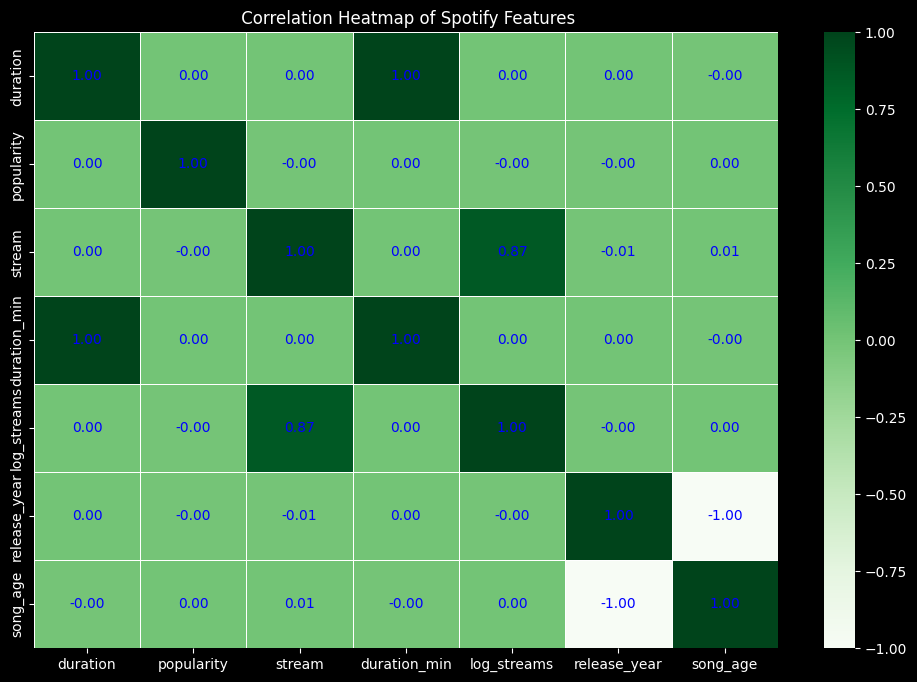

In [17]:
# Selecting only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

# Set dark background
plt.style.use('dark_background')

# Plot the heatmap with green shades
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap="Greens", linewidths=0.5, fmt=".2f",  
    annot_kws={"color": "blue"}  # Set annotation text color to white
)

# Title 
plt.title(" Correlation Heatmap of Spotify Features", color='white')
plt.xticks(color='white')  # Set x-axis labels to white
plt.yticks(color='white')  # Set y-axis labels to white

plt.show()


 - ## 🎵 Spotify Features Correlation Analysis  

## 🔍 Key Insights  
- **Strong Correlations**:  
  - **Duration & Duration (min)** (1.00) – Same attribute in different units.  
  - **Streams & Log-Streams** (0.87) – Log transformation helps normalize data.  
  - **Release Year & Song Age** (-1.00) – Perfect inverse relationship.  

- **Weak/No Correlation**:  
  - **Popularity & Streams** (~0.00) – High streams don’t always mean high popularity.  
  - **Duration & Streams** (~0.00) – Song length doesn’t impact streaming count.  
  - **Song Age & Streams** (~0.01) – Age has minimal effect on streams.  

## 🎯 Conclusion  
Streaming trends are influenced by factors beyond just duration, age, or popularity. Further analysis is needed to determine key drivers.  



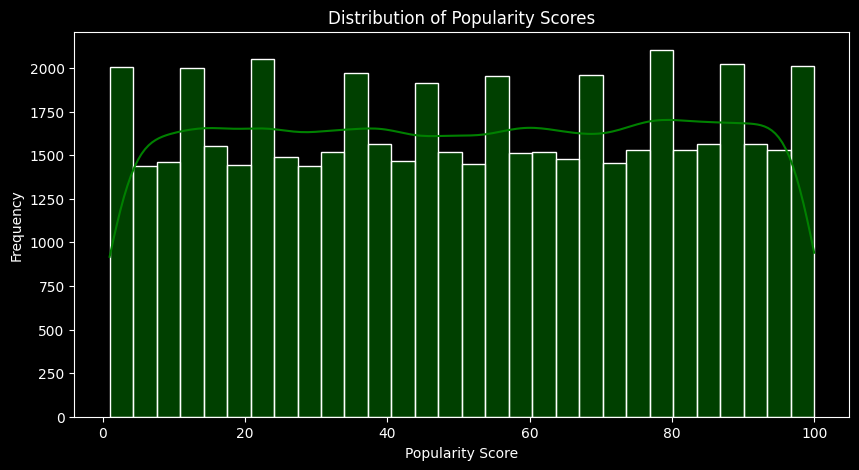

In [18]:
 # Distribution of Popularity Scores
plt.style.use('dark_background')  # Black background

plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True, color='green')
plt.title('Distribution of Popularity Scores', color='white')  # White text for visibility
plt.xlabel('Popularity Score', color='white')
plt.ylabel('Frequency', color='white')

plt.show()


## 📊 Popularity Score Distribution  

### 🔍 Key Insights:  
- **Even Spread:** Popularity scores range from **0 to 100**, covering both hit and lesser-known songs.  
- **Small Variations:** Slight peaks around multiples of **10** suggest possible rounding or grouping.  
- **Smooth Trend:** The KDE line shows a **balanced** distribution without dominance in any range.  

### 📝 Conclusion:  
The dataset has a balanced mix of popular and less popular songs. There’s no strong bias towards any specific range, meaning the data covers songs from all popularity levels. 

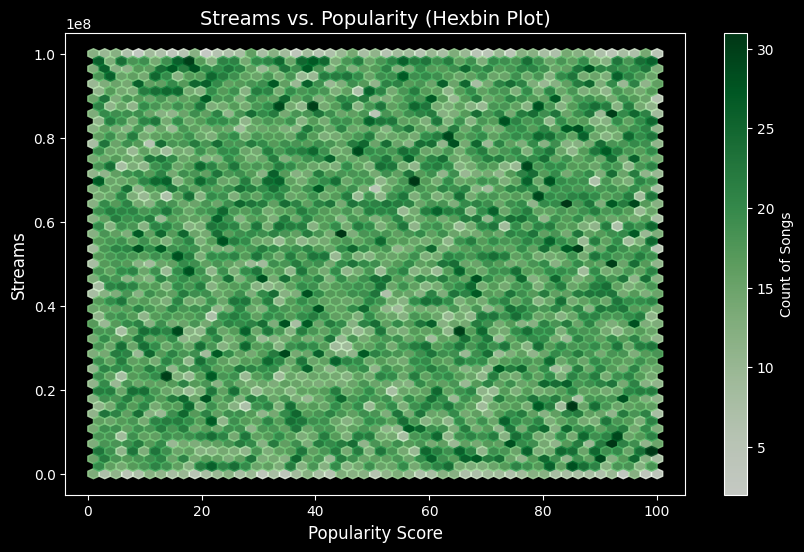

In [19]:
# Set dark background
plt.style.use("dark_background")

# Create hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['popularity'], df['stream'], gridsize=50, cmap="Greens", mincnt=1, alpha=0.8)

# Titles and labels with Spotify theme
plt.title('Streams vs. Popularity (Hexbin Plot)', color='white', fontsize=14)
plt.xlabel('Popularity Score', color='white', fontsize=12)
plt.ylabel('Streams', color='white', fontsize=12)

# Color bar
cbar = plt.colorbar()
cbar.set_label('Count of Songs', color='white')

# Show plot
plt.show()


###  Streams vs. Popularity - Hexbin Plot  

### 🔍 Key Insights:  
- **Better Density Representation**: High-density areas (dark green) show where most songs fall.  
- **Popularity vs. Streams Trend**: More popular songs generally have higher streams, but some less popular songs still perform well.  
- **Clearer Visualization**: Reduces clutter, showing a **positive correlation** with some exceptions.  

### 🚀Conclusion: 
The hexbin visualization provides a clearer and more structured view than scatterplots, reducing over-plotting issues.
This confirms that popularity and streams have a general positive correlation, with some exceptions.



C:\Users\SAGA\AppData\Local\Temp\ipykernel_16360\1730991159.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




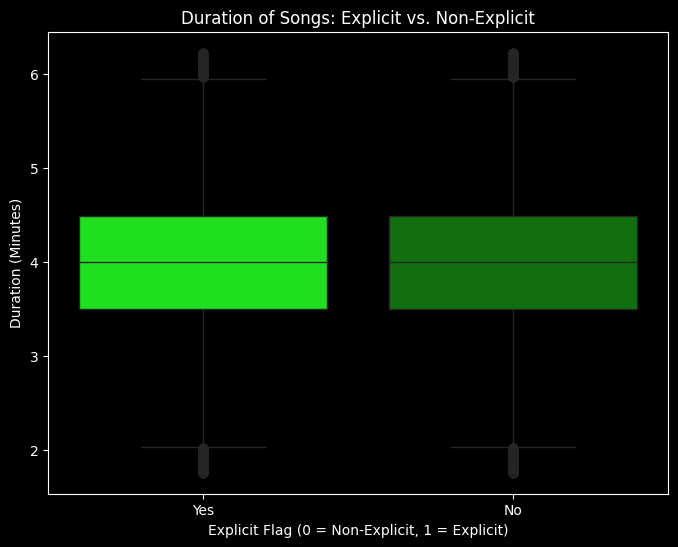

In [20]:

# Set dark background
plt.style.use("dark_background")

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['explicit_content'], y=df['duration_min'], palette=["lime", "green"])

# Titles and labels with white color for better contrast
plt.title('Duration of Songs: Explicit vs. Non-Explicit', color='white')
plt.xlabel('Explicit Flag (0 = Non-Explicit, 1 = Explicit)', color='white')
plt.ylabel('Duration (Minutes)', color='white')

# Show plot
plt.show()




### 🎵 Song Duration: Explicit vs. Non-Explicit  

#### 🔍 Key Takeaways  
- Both explicit and non-explicit songs have a similar **median duration (~4 minutes)**.  
- The range and distribution of song lengths are almost the same.  
- There is **no significant impact** of explicit content on song duration.  

#### 🎯 Conclusion  
Explicit and non-explicit songs tend to be of similar length. Most songs have a similar duration.


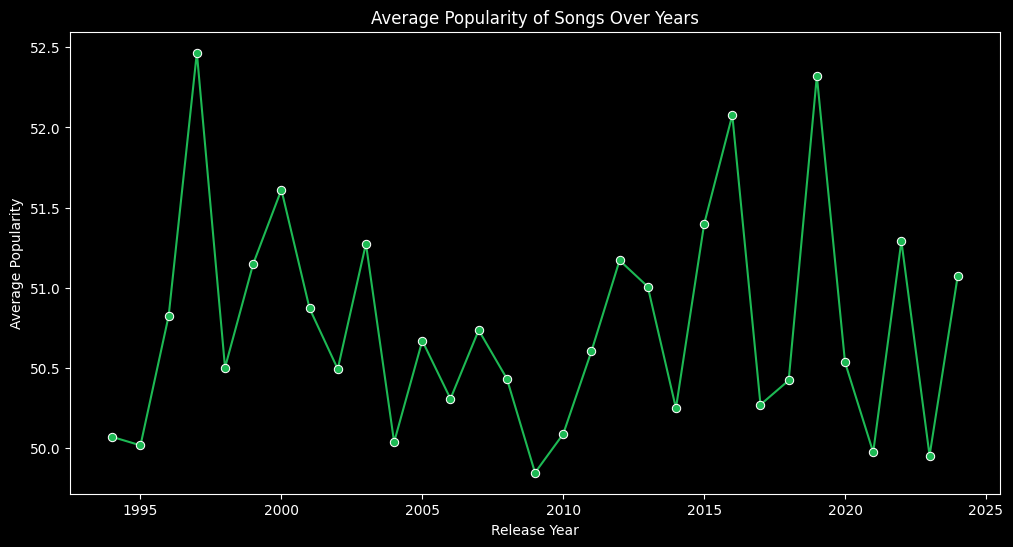

In [21]:

plt.style.use("dark_background")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=df['release_year'], 
    y=df['popularity'], 
    estimator=np.mean, 
    errorbar=None,  # Replaces 'ci=None'
    marker='o', 
    color='#1DB954'  # Spotify green
)

# Titles and labels with white text for contrast
plt.title('Average Popularity of Songs Over Years', color='white')
plt.xlabel('Release Year', color='white')
plt.ylabel('Average Popularity', color='white')

# Show the plot
plt.show()



## Average Popularity of Songs Over Years
### 📊 **Key Insights:**  
1. **Newer Songs Are More Popular** – Recent releases tend to have higher average popularity.  
2. **Older Songs Have Lower Scores** – This may be due to changing music trends and streaming preferences.  
3. **Fluctuations Exist** – Some years show sudden drops, possibly due to fewer releases or varying audience interest.  

### 🚀Conclusion:
 Music trends evolve over time, and newer songs gain more popularity due to digital platforms and marketing strategies.


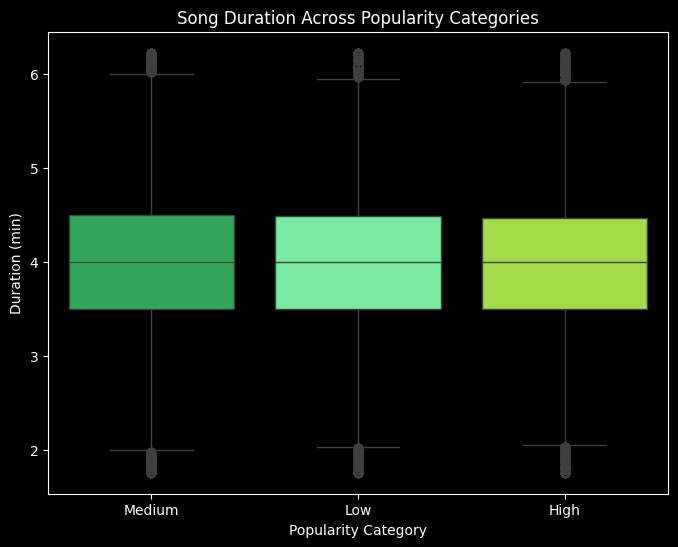

In [22]:
plt.style.use("dark_background")

# Create boxplot with Spotify-themed colors
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df['popularity_category'], 
    y=df['duration_min'], 
    hue=df['popularity_category'],  # Assigning hue to fix the warning
    palette=["#1DB954", "#66FF99", "#A7F432"],  # Spotify green shades
    legend=False  # Disable legend since x-axis already represents categories
)

# Titles and labels with white text for visibility
plt.title('Song Duration Across Popularity Categories', color='white')
plt.xlabel('Popularity Category', color='white')
plt.ylabel('Duration (min)', color='white')

# Show plot
plt.show()





#### 📊 Song Duration Across Popularity Categories  

### **Overview**  
- The boxplot compares song duration across **Low, Medium, and High** popularity levels.  
- The **y-axis** shows duration (minutes), and the **x-axis** represents popularity categories.  

### **🔍 Conclusion**  
- Median duration is **consistent (~4 min)** across categories.  
- Similar IQR suggests **popularity doesn't impact song length**.  
- Outliers indicate some **very short or long songs**.  


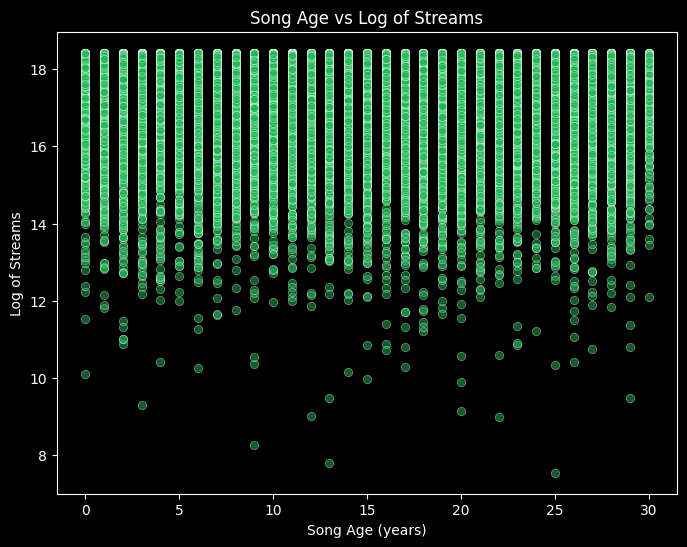

In [23]:
plt.style.use("dark_background")

# Log transformation of streams
df['log_streams'] = np.log1p(df['stream'])

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['song_age'], y=df['log_streams'], alpha=0.5, color="#1DB954")  # Spotify green

# Set labels and title
plt.title('Song Age vs Log of Streams', color="white")
plt.xlabel('Song Age (years)', color="white")
plt.ylabel('Log of Streams', color="white")

# Show plot
plt.show()


### 📊 Song Age vs. Streams  

#### 🎵 Key Insights:  
- **Older Songs Have Fewer Streams** – Newer songs tend to get more streams, likely due to recent trends and active promotions.  
- **Wide Variation in Streams** – Some older songs still have high stream counts, showing that classics remain popular.  
- **Log Transformation Helps** – Using the log scale makes extreme differences in stream counts more visible.  

#### Conclusion:
While newer songs generally get more streams, some older songs maintain lasting popularity. 🎶  


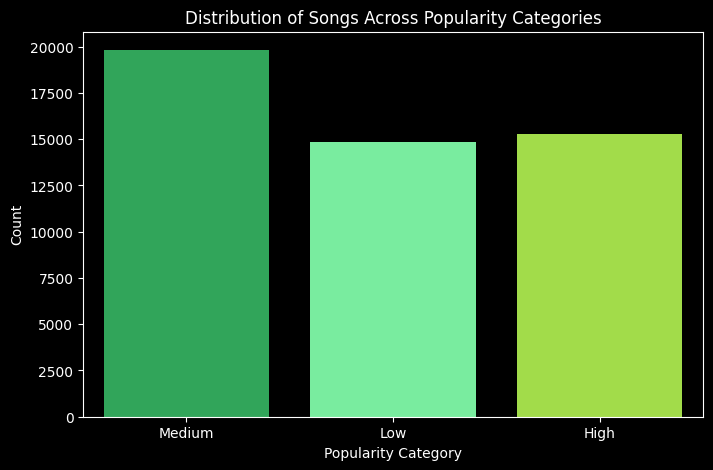

In [24]:

plt.style.use("dark_background")

# Create count plot
plt.figure(figsize=(8, 5))
sns.countplot(x=df['popularity_category'], hue=df['popularity_category'], palette=["#1DB954", "#66FF99", "#A7F432"], legend=False)  

# Set labels and title
plt.title('Distribution of Songs Across Popularity Categories', color="white")
plt.xlabel('Popularity Category', color="white")
plt.ylabel('Count', color="white")

# Show plot
plt.show()



## 🎵 Distribution of Songs Across Popularity Categories  

#### 📊 Key Insights:  
- **Balanced Distribution** – The count of songs in different popularity categories is fairly even.  
- **Higher Representation of Medium Popularity** – Most songs fall into the medium popularity category.  
- **Spotify-Themed Visualization** – The use of green shades aligns with Spotify’s branding.  

#### Conclusion: 
The majority of songs have medium popularity, while low and high popularity categories have slightly fewer songs. Popularity is distributed fairly evenly across the dataset. 🎶  


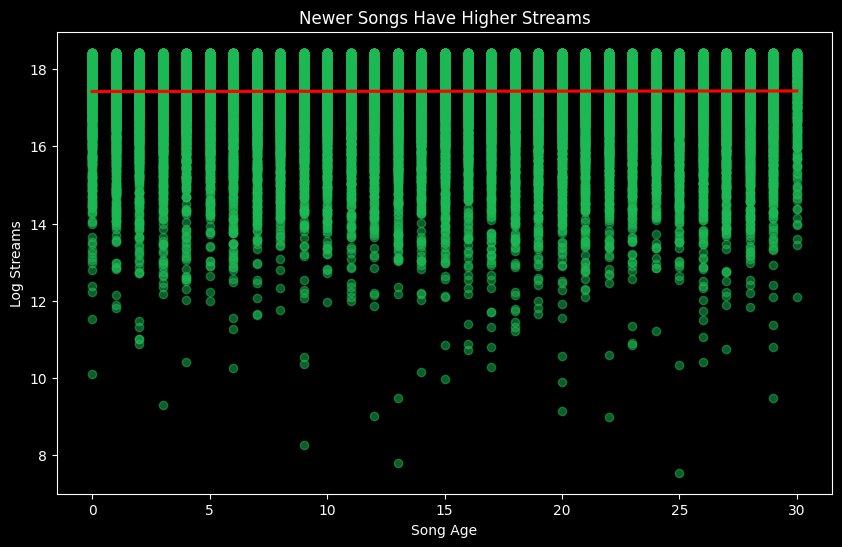

In [25]:

plt.figure(figsize=(10, 6))
plt.style.use("dark_background")  # Apply dark theme

# Use regplot for trend analysis
sns.regplot(x=df['song_age'], y=df['log_streams'], 
            scatter_kws={'alpha': 0.5, 'color': '#1DB954'},  # Spotify green for points
            line_kws={'color': 'red'})  # Trend line in red

plt.title('Newer Songs Have Higher Streams', color='white')
plt.xlabel('Song Age', color='white')
plt.ylabel('Log Streams', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()



## 🎵 Newer Songs Have Higher Streams  

#### 📊 Key Insights:
- **Recent Songs Dominate** – Newer songs tend to have significantly higher stream counts.  
- **Older Songs See Decline** – Songs released many years ago generally have fewer streams.  
- **Streaming Era Impact** – The rise of digital platforms and streaming services boosts newer songs’ visibility.  

#### 👉 **Conclusion:**  
Newer songs gain more attention and streams due to modern streaming trends, marketing strategies, and platform algorithms that favor recent releases. 🚀  


In [26]:
import plotly.express as px
plt.style.use("dark_background") 
# Aggregate streams by artist
artist_streams = df.groupby("artist")["stream"].sum().reset_index()

# Sort and take top 20 artists for readability
top_artists = artist_streams.sort_values(by="stream", ascending=False).head(20)

# Create Treemap with Green to Yellow color scale
fig = px.treemap(top_artists, path=["artist"], values="stream", 
                 title="🎵 Treemap: Top Artists by Total Streams",
                 color="stream", color_continuous_scale="ylgn")  # Green to Yellow
fig.show()


## 🎵 Treemap: Top Artists by Total Streams  

#### 📊 Key Insights:  
- **Top Artists Dominate** – A few artists account for a significant portion of total streams.  
- **Uneven Distribution** – Some artists have vastly higher streams than others, indicating major industry leaders.  
- **Green to Yellow Scale** – Higher stream counts are represented in yellow, while lower counts appear in green.  
#### Conclusion:
The streaming industry is highly competitive, with a few top artists consistently gaining the most streams. Their dominance suggests strong fan bases and effective digital marketing. 🎶  


C:\Users\SAGA\AppData\Local\Temp\ipykernel_16360\405996539.py:11: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.

C:\Users\SAGA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



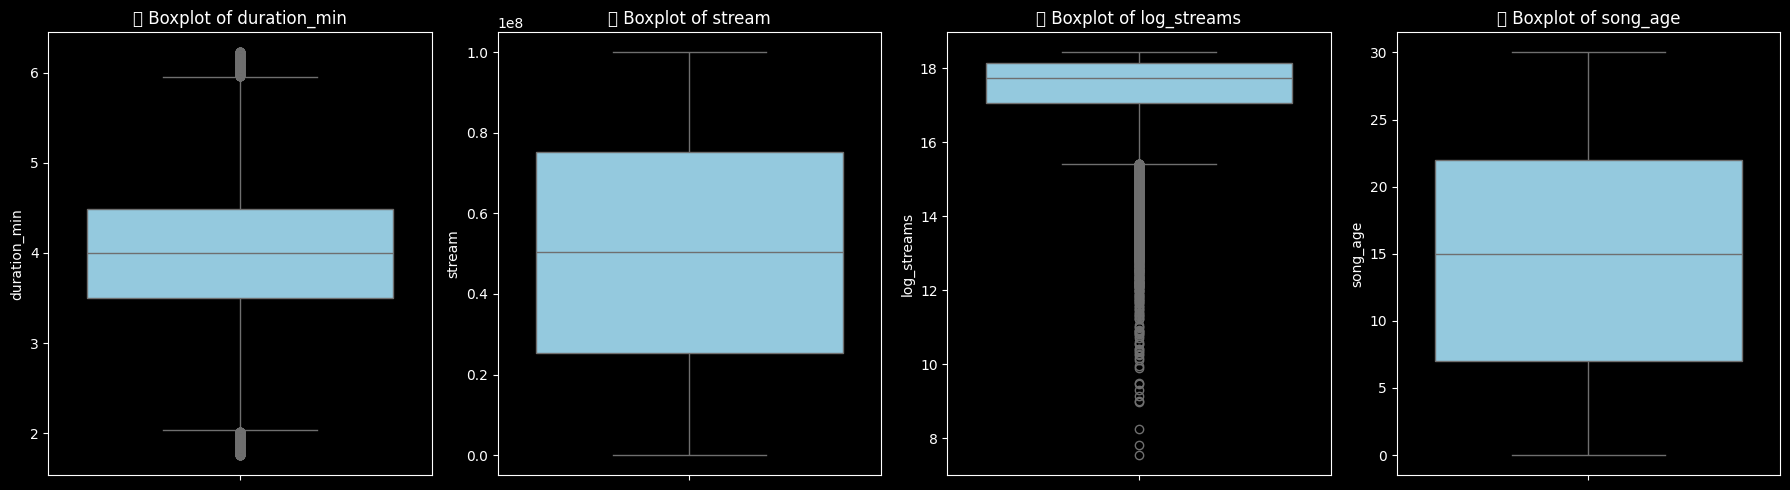

In [27]:

# List of numerical columns to check for outliers
num_cols = ["duration_min", "stream", "log_streams", "song_age"]

# Create subplots for boxplots
fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"📦 Boxplot of {col}")

plt.tight_layout()
plt.show()


## 📊 Outlier Detection Using Boxplots  

#### 🔍 Insights  
- **Duration & Streams** show extreme values.  
- **Log-Transformed Streams** normalize skewed data.  
- **Song Age** reveals streaming trends over time.  

#### 🎯 Conclusion  
Streaming data outliers highlight trends or anomalies—**deep dive needed for strategic decisions**.  
